# Data Wrangling


In [43]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import matplotlib.pyplot as plt

## Gather Data

### Gather data from file on hand

In [44]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

#### Extract the tweet_id from url

In [45]:
df1.tweet_id=df1.expanded_urls.str.extract('(\d{18})')
df1.tweet_id[0:5]

c:\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: object

### Download file using Requests library and URL

In [46]:
response= requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
df2=pd.read_csv('image_prediction.tsv',delimiter='\t')

### Gather data from twitter API using Python's Tweepy library and store data

In [47]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
'''
txt_file=open('tweet_json.txt','w')
#txt_file.write('tweet_id retweet_count favorite_count''\n')
for tweet_id in df1.tweet_id:
    try:
        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')
        retweet_count=tweet_info.retweet_count
        print(tweet_id)
        favorite_count=tweet_info.favorite_count
        txt_file.write(tweet_id+' '+str(retweet_count)+' '+str(favorite_count)+'\n')  
    except Exception as e:
        print('error')
txt_file.close()
'''
df3=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        df3=df3.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)

## Assess Data

In [48]:
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2190 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [49]:
df1.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [50]:
df2.info()
df3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978
5,891087950875897856,3237,20538
6,890971913173991426,2140,12048
7,890729181411237888,19527,66584
8,890609185150312448,4396,28169
9,890240255349198849,7665,32446


In [51]:
df3.info()
df3.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 3 columns):
tweet_id          2186 non-null object
retweet_count     2186 non-null object
favorite_count    2186 non-null object
dtypes: object(3)
memory usage: 25.7+ KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8836,39455
1,892177421306343426,6475,33767
2,891815181378084864,4296,25427
3,891689557279858688,8915,42831
4,891327558926688256,9708,40978
5,891087950875897856,3237,20538
6,890971913173991426,2140,12048
7,890729181411237888,19527,66584
8,890609185150312448,4396,28169
9,890240255349198849,7665,32446


### Quality
- In df1,the tweet_ID is not the right data type and value. I extracted the tweet_ID from expanded_urls, but still some tweet_ID is missing.
- Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id
- In df1, we only want original ratings (no retweets).So the retweets shouldn't be there. 
- We only want ratings with images. Not all ratings have images.
- In df1, some ratings are wrong.
- In df1, erroneous datatype for timestamp
- In df1, nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
- In df1, some dog names are not correct.
- In df2, some predictions are not dogs, there is no column for the most possible breed of a dog.

### Tidiness
- In df1, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.
- in df1, the columns 'doggo', 'floofer', 'pupper','puppo' show one variable.
- df3 should be part of df1.
- rating_numerator and denominator should be one variable rating.

## Clean Data

In [52]:
df1_clean=df1.copy()
df2_clean=df2.copy()
df3_clean=df3.copy()

#### Issue
In df1, the columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.
#### Define
Delete retweets and observations without ID, delete columns: 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

In [53]:
df1_clean=df1_clean[df1.tweet_id.notnull()]
df1_clean=df1_clean[df1.retweeted_status_id.isnull()]
df1_clean=df1_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

c:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Test

In [54]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2023 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2023 non-null object
source                   2023 non-null object
text                     2023 non-null object
expanded_urls            2023 non-null object
rating_numerator         2023 non-null int64
rating_denominator       2023 non-null int64
name                     2023 non-null object
doggo                    2023 non-null object
floofer                  2023 non-null object
pupper                   2023 non-null object
puppo                    2023 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 158.0+ KB


#### Issue
We only want ratings with images. Not all ratings have images.
#### Define
Delete observations without image
#### Code

In [55]:
df2_clean.tweet_id=df2_clean.tweet_id.astype(str)
image_id=df2_clean[['tweet_id']]
df1_clean=pd.merge(df1_clean,image_id,on='tweet_id')

#### Test

In [56]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 155.8+ KB


#### Issue
One variable in four columns in df1. Nulls represented as 'None' in columns 'name', 'doggo', 'floofer', 'pupper','puppo'.
#### Define
Create column 'stage' to show dog stage, drop columns 'doggo','floofer','pupper','puppo'. Replace 'None' with np.nan.
#### Code

In [57]:
df1_clean.doggo=df1_clean.doggo.replace('None','')
df1_clean.floofer=df1_clean.floofer.replace('None','')
df1_clean.pupper=df1_clean.pupper.replace('None','')
df1_clean.puppo=df1_clean.puppo.replace('None','')
df1_clean['stage']=df1_clean.doggo.str.cat(df1_clean.floofer).str.cat(df1_clean.pupper).str.cat(df1_clean.puppo)
df1_clean=df1_clean.drop(['doggo','floofer','pupper','puppo'],axis=1)
df1_clean.stage=df1_clean.stage.replace('',np.nan)

#### Test

In [58]:
df1_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/

#### Issue
df3 should be part of df1.
#### Define
Join df3 table to df1 table, joining on tweet_id.
#### Code

In [59]:
df3_clean=df3_clean[~(df3_clean.tweet_id.duplicated())]
df1_clean=pd.merge(df1_clean,df3_clean,on='tweet_id',how='left')
df1_clean[df1_clean.tweet_id=='887473957103951883']
missingcount_id=df1_clean.tweet_id[df1_clean.retweet_count.isnull()]

#### Test

In [60]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
retweet_count            1992 non-null object
favorite_count           1992 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 212.0+ KB


#### Issue
Missing retweet_count and favorite_count for two oberservations
#### Define
Gather Missing data from tweet API.
#### Code

In [61]:
tweet_info=api.get_status(missingcount_id.iloc[0],tweet_mode='extended')
df1_clean.loc[df1_clean.tweet_id==missingcount_id.iloc[0],['retweet_count','favorite_count']]=[tweet_info.retweet_count,tweet_info.favorite_count]
tweet_info2=api.get_status(missingcount_id.iloc[1],tweet_mode='extended')
df1_clean.loc[df1_clean.tweet_id==missingcount_id.iloc[1],['retweet_count','favorite_count']]=[tweet_info2.retweet_count,tweet_info2.favorite_count]

In [62]:
df1_clean['retweet_count']=df1_clean['retweet_count'].astype(int)
df1_clean['favorite_count']=df1_clean['favorite_count'].astype(int)

#### Test

In [63]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
retweet_count            1994 non-null int32
favorite_count           1994 non-null int32
dtypes: float64(2), int32(2), int64(2), object(7)
memory usage: 212.0+ KB


#### Issue
In df1, erroneous datatype for timestamp
#### Define
Convert timestamp to datetime data type.
#### Code

In [64]:
df1_clean.timestamp=pd.to_datetime(df1_clean.timestamp)

#### Issue
Erroneous datatypes and values for in_reply_to_status_id,in_reply_to_user_id
#### Define
convert in_reply_to_status_id,in_reply_to_user_id to string data type. Query data from API
#### Code

In [65]:
reply_id=df1_clean.tweet_id[df1_clean.in_reply_to_user_id.notnull()]
df1_clean.in_reply_to_user_id=df1_clean.in_reply_to_user_id.astype(str)
df1_clean.in_reply_to_status_id=df1_clean.in_reply_to_status_id.astype(str)
for each_id in reply_id:
    tweet_info=api.get_status(each_id,tweet_mode='extended')
    df1_clean.loc[df1_clean.tweet_id==each_id, 'in_reply_to_user_id']=str(tweet_info.in_reply_to_user_id)
    df1_clean.loc[df1_clean.tweet_id==each_id, 'in_reply_to_status_id']=str(tweet_info.in_reply_to_status_id)
df1_clean.in_reply_to_user_id=df1_clean.in_reply_to_user_id.replace('nan',np.nan)
df1_clean.in_reply_to_status_id=df1_clean.in_reply_to_status_id.replace('nan',np.nan)

#### Test

In [66]:
df1_clean.info()
df1_clean[df1_clean.in_reply_to_user_id.notnull()]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 13 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
stage                    306 non-null object
retweet_count            1994 non-null int32
favorite_count           1994 non-null int32
dtypes: datetime64[ns](1), int32(2), int64(2), object(8)
memory usage: 204.2+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
119,863079547188785154,667152164079423490,4196983835,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ladies and gentlemen... I found Pipsy. He may have changed his name to Pablo, but he never changed his love for the sea. Pupgraded to 14/10 https://t.co/lVU5GyNFen",https://twitter.com/dog_rates/status/863079547188785154/photo/1,14,10,None,NaN,1189,9076
146,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY HI AFTER ALL. PUPGRADED TO A 14/10. WOULD BE AN HONOR TO FLY WITH https://t.co/p1hBHCmWnA",https://twitter.com/dog_rates/status/856526610513747968/photo/1,14,10,None,NaN,2045,12410
192,844979544864018432,759099523532779520,4196983835,2017-03-23 18:29:57,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: I'm proud to announce that Toby is 236 days sober. Pupgraded to a 13/10. We're all very proud of you, Toby https://t.co/a5OaJeRl9B","https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1,https://twitter.com/dog_rates/status/844979544864018432/photo/1",13,10,None,NaN,2887,14664
419,802265048156610565,733109485275860992,4196983835,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggopupper,1567,7006
756,746906459439529985,746885919387574272,4196983835,2016-06-26 03:22:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,NaN,334,3154
758,746818907684614144,691416866452082688,4196983835,2016-06-25 21:34:37,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ,https://twitter.com/dog_rates/status/746818907684614144/photo/1,13,10,None,NaN,1932,5778
855,729838605770891264,729113531270991872,4196983835,2016-05-10 01:00:58,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Challenge completed"" \n(pupgraded to 12/10) https://t.co/85dTK7XCXB",https://twitter.com/dog_rates/status/729838605770891264/video/1,12,10,None,NaN,426,1847
1035,705786532653883392,703255935813287936,4196983835,2016-03-04 16:06:36,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Seriously, add us 🐶 11/10 for sad wet pupper https://t.co/xwPE9faVZR",https://twitter.com/dog_rates/status/705786532653883392/photo/1,11,10,None,pupper,592,2123
1044,704871453724954624,667152164079423490,4196983835,2016-03-02 03:30:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I found a forest Pipsy. 12/10 https://t.co/mIQ1KoVsmU,https://twitter.com/dog_rates/status/704871453724954624/photo/1,12,10,None,NaN,1245,4591
1059,703425003149250560,703041949650034688,4196983835,2016-02-27 03:42:44,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Really guys? Again? I know this is a rare Albanian Bingo Seal, but we only rate dogs. Only send in dogs... 9/10 https://t.co/6JYLpUmBrC",https://twitter.com/dog_rates/status/703425003149250560/photo/1,9,10,None,NaN,1552,4153


#### Issue
In df1, nulls represented as 'None' in columns 'name', some values are wrong in name. Names that varen't capitalized are wrong.
#### Define
Set the value wrong names to 'None' and replace 'None' with np.nan.
#### Code

In [67]:
df1_clean.loc[df1_clean.name.str.islower(),'name']='None'
df1_clean.name=df1_clean.name.replace('None',np.nan)

#### Issue
- In df1, some ratings are wrong.
- Rating_numerator and denominator should be one variable rating.

#### Define
- Change the rating_numerator and rating_denominator for oberservations with wrong value
- Oberservations with tweet_id '810984652412424192'doesn't have a valid rating, so drop this row.
- Create new column rating=rating_numerator/rating_denominator. Drop rating_numerator and rating_denominator.
- Drop oberservations with extreme ratings.

#### Code

In [68]:
pd.set_option('display.max_colwidth', -1)
df1_clean.loc[df1_clean.rating_denominator!=10,['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
323,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
385,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
662,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
800,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
848,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
891,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
925,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
946,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
970,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
988,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [69]:
df1_clean=df1_clean[df1_clean.tweet_id!='810984652412424192']
df1_clean.loc[df1_clean.tweet_id=='740373189193256964',['rating_numerator','rating_denominator']]=[14,10]
df1_clean.loc[df1_clean.tweet_id=='722974582966214656',['rating_numerator','rating_denominator']]=[13,10]
df1_clean.loc[df1_clean.tweet_id=='716439118184652801',['rating_numerator','rating_denominator']]=[11,10]
df1_clean.loc[df1_clean.tweet_id=='682962037429899265',['rating_numerator','rating_denominator']]=[10,10]
df1_clean.loc[df1_clean.tweet_id=='666287406224695296',['rating_numerator','rating_denominator']]=[9,10]


df1_clean['rating']=df1_clean.rating_numerator/df1_clean.rating_denominator
df1_clean=df1_clean.drop(['rating_numerator','rating_denominator'],axis=1)

df1_clean.loc[df1_clean.rating>2,['tweet_id','text','rating']]


,tweet_id,text,rating
503,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",7.5
553,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,2.7
726,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,177.6
1374,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,2.6
1718,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,42.0


In [70]:
df1_clean.loc[df1_clean.tweet_id=='786709082849828864','rating']=1.0
df1_clean.loc[df1_clean.tweet_id=='778027034220126208','rating']=1.1
df1_clean.loc[df1_clean.tweet_id=='680494726643068929','rating']=1.1
df1_clean=df1_clean[df1_clean.rating<2]

#### Test

In [71]:
df1_clean.rating.sort_values()

235     0.0
756     0.0
1735    0.1
1900    0.1
1976    0.1
1519    0.1
1887    0.2
1878    0.2
1419    0.2
1948    0.2
1422    0.2
1987    0.2
1723    0.2
1566    0.2
1964    0.2
1574    0.3
1584    0.3
554     0.3
1355    0.3
1547    0.3
1880    0.3
1592    0.3
1273    0.3
1780    0.3
1487    0.3
1167    0.3
1943    0.3
1844    0.3
1826    0.3
1021    0.3
       ... 
9       1.4
786     1.4
146     1.4
275     1.4
162     1.4
153     1.4
119     1.4
206     1.4
549     1.4
399     1.4
324     1.4
49      1.4
113     1.4
455     1.4
131     1.4
36      1.4
297     1.4
362     1.4
64      1.4
1280    1.4
278     1.4
100     1.4
313     1.4
256     1.4
253     1.4
318     1.4
21      1.4
681     1.4
800     1.4
571     1.4
Name: rating, Length: 1991, dtype: float64

#### Issue
In df2, some predictions are not dogs, there is no column for the most possible breed of a dog and the confidence.
#### Define
Create new columns predicted_breed and predicted_conf for the most possible breed of a dog and the confidence.
#### Code

In [72]:
df2_clean['predicted_breed']=df2_clean.p1
df2_clean.predicted_breed[df2_clean.p1_dog==False]=df2_clean.p2
df2_clean.predicted_breed[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)]= df2_clean.p3
df2_clean.predicted_breed[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)&(df2_clean.p3_dog==False)]='None' 
df2_clean.predicted_breed=df2_clean.predicted_breed.replace('None',np.nan)
df2_clean.predicted_breed[:10]

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    Welsh_springer_spaniel
1    redbone               
2    German_shepherd       
3    Rhodesian_ridgeback   
4    miniature_pinscher    
5    Bernese_mountain_dog  
6    NaN                   
7    chow                  
8    golden_retriever      
9    miniature_poodle      
Name: predicted_breed, dtype: object

In [73]:
df2_clean['predicted_conf']=df2_clean.p1_conf
df2_clean.predicted_conf[df2_clean.p1_dog==False]=df2_clean.p2_conf
df2_clean.predicted_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)]= df2_clean.p3_conf
df2_clean.predicted_conf[(df2_clean.p1_dog==False)&(df2_clean.p2_dog==False)&(df2_clean.p3_dog==False)]=0 
df2_clean.predicted_conf=df2_clean.predicted_conf.replace(0,np.nan)
df2_clean.predicted_conf[:10]

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0    0.465074
1    0.506826
2    0.596461
3    0.408143
4    0.560311
5    0.651137
6   NaN      
7    0.692517
8    0.007959
9    0.201493
Name: predicted_conf, dtype: float64

### Final Test

In [74]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1991 entries, 0 to 1993
Data columns (total 12 columns):
tweet_id                 1991 non-null object
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
timestamp                1991 non-null datetime64[ns]
source                   1991 non-null object
text                     1991 non-null object
expanded_urls            1991 non-null object
name                     1348 non-null object
stage                    306 non-null object
retweet_count            1991 non-null int32
favorite_count           1991 non-null int32
rating                   1991 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(2), object(8)
memory usage: 124.4+ KB


In [75]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id           2075 non-null object
jpg_url            2075 non-null object
img_num            2075 non-null int64
p1                 2075 non-null object
p1_conf            2075 non-null float64
p1_dog             2075 non-null bool
p2                 2075 non-null object
p2_conf            2075 non-null float64
p2_dog             2075 non-null bool
p3                 2075 non-null object
p3_conf            2075 non-null float64
p3_dog             2075 non-null bool
predicted_breed    1751 non-null object
predicted_conf     1751 non-null float64
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 135.8+ KB


## Store Data
Store the clean DataFrame df1_clean in a CSV file named twitter_archive_master.csv and df2_clean in additional file 'twitter_image_predictions.csv'.

In [76]:
df1_clean.to_csv('twitter_archive_master.csv', index=False)
df2_clean.to_csv('twitter_image_predictions.csv', index=False)

## Analyze and Visualize Data

In [77]:
df1_clean.describe()

,retweet_count,favorite_count,rating
count,1991.000000,1991.000000,1991.000000
mean,2764.686087,8915.371673,1.055450
std,4713.159190,12400.652738,0.217822
min,15.000000,81.000000,0.000000
25%,619.000000,1962.500000,1.000000
50%,1342.000000,4109.000000,1.100000
75%,3197.500000,11269.000000,1.200000
max,79033.000000,132214.000000,1.400000


In [78]:
values=np.sort(df1_clean.rating.unique())
values

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4])

In [79]:
rating_analyze=pd.DataFrame(columns=['rating','number','retweet','favorite'])
rating_analyze['rating']=values
for x in rating_analyze['rating']:
    this_df=df1_clean[df1_clean.rating==x]
    rating_analyze.loc[rating_analyze.rating==x,'number']=this_df['tweet_id'].count()
    rating_analyze.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    rating_analyze.loc[rating_analyze.rating==x,'favorite']=this_df.favorite_count.mean()
rating_analyze[['rating','number']].plot(x='rating',kind='bar', title='Rating Distribution')
rating_analyze[['rating','retweet','favorite']].plot(x='rating',title='Rating-Retweet&Favorite Analysis')

In [80]:
stage_analyze=pd.DataFrame(columns=['stage','number','rating','retweet','favorite'])
stage_analyze['stage']=['doggo','floofer','pupper','puppo']
for each_stage in stage_analyze.stage:
    stage_df=df1_clean[df1_clean.stage==each_stage]
    stage_analyze.loc[stage_analyze.stage== each_stage,'number']=stage_df.shape[0]
    stage_analyze.loc[stage_analyze.stage== each_stage,'rating']=stage_df['rating'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'retweet']=stage_df['retweet_count'].mean()
    stage_analyze.loc[stage_analyze.stage== each_stage,'favorite']=stage_df['favorite_count'].mean()
stage_analyze[['stage','number']].plot(x='stage',kind='bar',title='Dog Stages Distribution')
stage_analyze[['stage','retweet','favorite']].plot(x='stage',kind='bar',title='Dog Stage-Retweet&Favorite Analysis')
stage_analyze[['stage','rating']].plot(x='stage',kind='bar',title='Dog Stage-Rating Analysis')

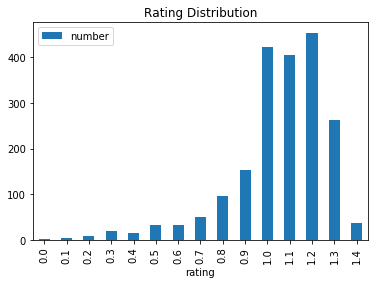

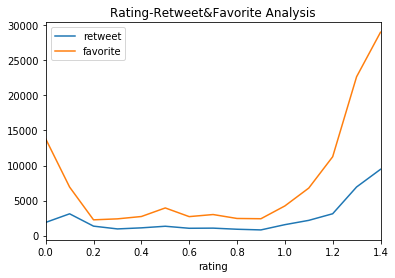

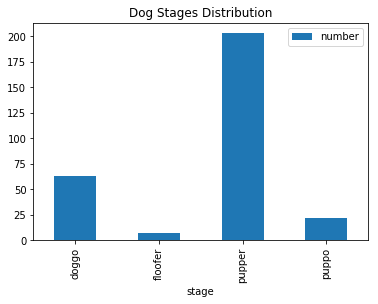

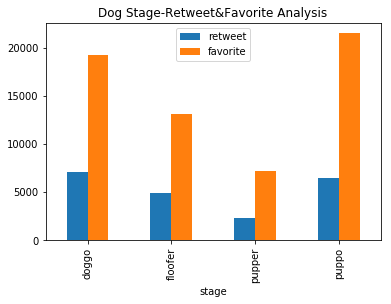

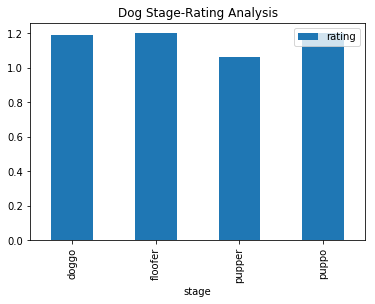

In [81]:
plt.show()

### Insights
- The mean for rating is 1.055;the 3 most common ratings are 1.2,1.0,1.1, and rating frequency becomes smaller as the rating becomes extreme. 
- Posts with extreme ratings get more favorites and retweets.Posts with rating 1.4 gets the highest favorite counts and retweet counts.
- Among the 4 dog stages, pupper has the biggest frequency, but pupper also gets the lowest favorite counts and retweet counts and rating.